In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#### AMEO_2015 dataset
df = pd.read_excel("ameo_2015.xlsx")
df.shape

(3998, 39)

In [4]:
df.isnull().sum().sum()

0

In [5]:
df.dtypes

Unnamed: 0                       object
ID                                int64
Salary                            int64
DOJ                      datetime64[ns]
DOL                              object
Designation                      object
JobCity                          object
Gender                           object
DOB                      datetime64[ns]
10percentage                    float64
10board                          object
12graduation                      int64
12percentage                    float64
12board                          object
CollegeID                         int64
CollegeTier                       int64
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeCityID                     int64
CollegeCityTier                   int64
CollegeState                     object
GraduationYear                    int64
English                           int64
Logical                           int64


In [6]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [7]:
df['Gender'].unique()

array(['f', 'm'], dtype=object)

In [8]:
df[['10percentage','12percentage','collegeGPA','Gender']].groupby(['Gender']).mean()

,10percentage,12percentage,collegeGPA
Gender,,,
f,80.932894,77.007618,74.048056
m,76.979000,73.666636,70.679947


In [9]:
df.groupby(['Gender']).describe()

ID                                                             \
         count           mean            std      min       25%       50%   
Gender                                                                      
f        957.0  653305.972832  361122.234928  30101.0  331251.0  626510.0   
m       3041.0  667095.283459  363871.960095  11244.0  335296.0  641821.0   

                             Salary                 ... nueroticism          \
             75%        max   count           mean  ...         75%     max   
Gender                                              ...                       
f       988486.0  1297877.0   957.0  294937.304075  ...      0.5262  2.7650   
m       991880.0  1298275.0  3041.0  311716.211772  ...      0.5262  3.3525   

       openess_to_experience                                              \
                       count      mean       std     min     25%     50%   
Gender                                                                     
f                      957.0  0.038246  0.941125 -6.6092 -0.4455  0.0973   
m                     3041.0 -0.193609  1.022113 -7.3757 -0.6692 -0.0943   

                        
           75%     max  
Gender                  
f       0.6721  1.8224  
m       0.4805  1.6302  

[2 rows x 216 columns]

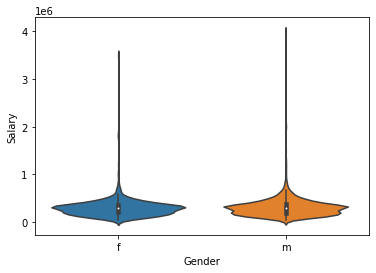

In [10]:
sns.violinplot(x = "Gender", y = "Salary",data = df);   

In [11]:
df[['conscientiousness', 'agreeableness', 'extraversion','nueroticism', 'openess_to_experience','Gender']].groupby(['Gender']).mean()

,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
Gender,,,,,
f,0.121034,0.292444,0.012173,-0.179358,0.038246
m,-0.087826,0.100566,-0.000198,-0.165783,-0.193609


In [12]:
df[['Salary','Gender']].groupby(['Gender']).mean()

,Salary
Gender,
f,294937.304075
m,311716.211772


In [13]:
threshold = df['Salary'].mean() + df['Salary'].std()
print(threshold)
df['HighIncome'] = (df['Salary'] > threshold)

520437.34988181875


In [14]:
df[['Salary','HighIncome','Gender']].groupby(["Gender",'HighIncome']).mean()

Salary
Gender HighIncome               
f      False       271499.454744
       True        832250.000000
m      False       272598.433606
       True        785344.827586

In [15]:
df[['Salary','HighIncome','Gender']].groupby(["Gender",'HighIncome']).median()

Salary
Gender HighIncome          
f      False       300000.0
       True        652500.0
m      False       290000.0
       True        620000.0

In [16]:
df[['Salary','HighIncome','Gender']].groupby(["Gender",'HighIncome']).count()

Salary
Gender HighIncome        
f      False          917
       True            40
m      False         2809
       True           232

In [17]:
df['CollegeTier'].unique()

array([2, 1])

In [18]:
df[['CollegeTier','HighIncome','Salary']].groupby(['HighIncome','CollegeTier']).count()

Salary
HighIncome CollegeTier        
False      1               234
           2              3492
True       1                63
           2               209

In [19]:
df[['Gender','CollegeTier','Salary']].groupby(['CollegeTier','Gender']).count()

Salary
CollegeTier Gender        
1           f           51
            m          246
2           f          906
            m         2795